# H1B Visa Application Analysis

### 1. UPLOAD DATA

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
# Data path
data_filename = r"C:\Users\sheng\OneDrive\Desktop\h1b_kaggle.csv"

In [4]:
# Read dataset
data = pd.read_csv(data_filename)

### 2. CLEANING AND INSPECTING DATA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [6]:
# This dataset has 11 columns with 3002458 rows
data.shape

(3002458, 11)

In [7]:
# Display column names
data.columns.values.tolist()

['Unnamed: 0',
 'CASE_STATUS',
 'EMPLOYER_NAME',
 'SOC_NAME',
 'JOB_TITLE',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'YEAR',
 'WORKSITE',
 'lon',
 'lat']

In [8]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [9]:
# Check if the dataset has any missing values
nnull=data.isnull()
nnull.sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [10]:
# Deal with missing values
# Because most missing values are catagorical values and are not applicable for imputing with mean or median, so we decide to delete rows that contain missing values.
# There is no outliers
data = data.dropna(axis=0)

In [11]:
# Check missing value again
nnull=data.isnull()
nnull.sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [12]:
# New dataset has 2877765 rows and 11 columns
data.shape

(2877765, 11)

In [13]:
#how many different worksites within this dataset?
len(data["WORKSITE"].value_counts())

2487

In [14]:
#how many different soc_name within this dataset?
len(data["SOC_NAME"].value_counts())

2043

In [15]:
# Display object variable frequencies for variable 'CASE_STATUS'
data['CASE_STATUS'].value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

### 3. DATA ANALYSIS

#### 1. What are the maximum, minimum, average and median wages for H1B application?

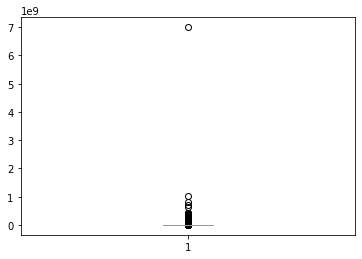

In [36]:
# Wage distribution
plt.boxplot(data["PREVAILING_WAGE"],showbox=True)
plt.show()

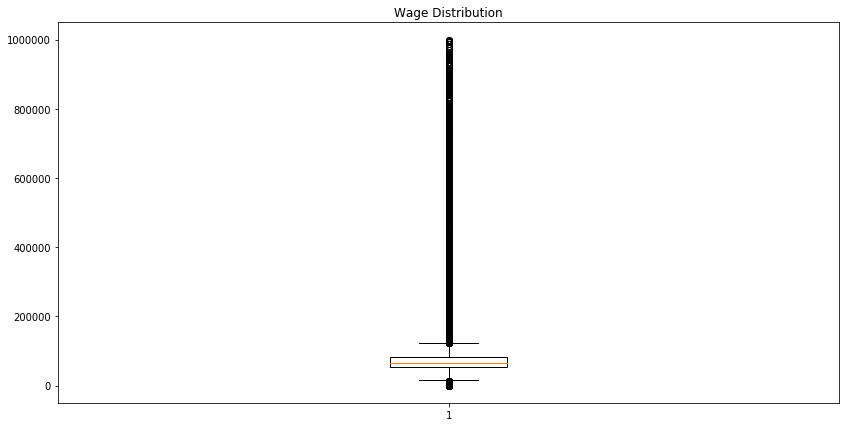

In [38]:
# Distribution for wage<= 1000000
f,ax=plt.subplots(figsize=(14,7))
plt.boxplot(data[data['PREVAILING_WAGE']<=1000000].PREVAILING_WAGE)
ax.set_title('Wage Distribution')
plt.show()

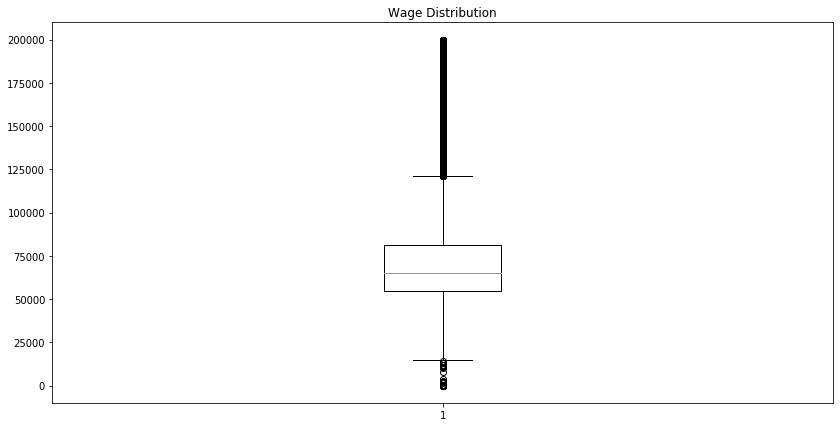

In [39]:
# Distribution for wage<= 200000
f,ax=plt.subplots(figsize=(14,7))
plt.boxplot(data[data['PREVAILING_WAGE']<=200000].PREVAILING_WAGE)
ax.set_title('Wage Distribution')
plt.show()

In [16]:
data.PREVAILING_WAGE.describe()

count    2.877765e+06
mean     1.451666e+05
std      5.307856e+06
min      0.000000e+00
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

#### 2. Which companies filled most of H1B visa applications?

In [17]:
company_name_count = data.groupby('EMPLOYER_NAME').size()
Top_10_EMPLOYER_NAME = company_name_count.sort_values(ascending=False)[:10]
print(Top_10_EMPLOYER_NAME)

EMPLOYER_NAME
INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
dtype: int64


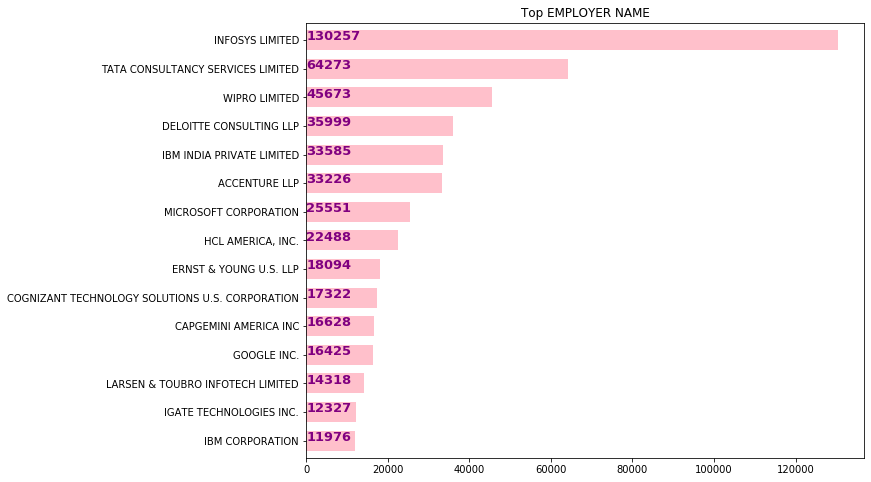

In [18]:
plt.figure(figsize=(10,8))
cc=data['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:15].plot.barh(width=0.7,color='pink')
for index, value in enumerate(data['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:15]): 
    cc.text(.9, index, value,fontsize=13,color='purple',weight='bold')
plt.title('Top EMPLOYER NAME')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

#### 3. Which employeer with high applications offers the lowest median wages?

In [19]:
high_emp=data['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:20].to_frame()
data[data['EMPLOYER_NAME'].isin(high_emp.index)&(data['PREVAILING_WAGE']<=150000)].groupby(['EMPLOYER_NAME'])['PREVAILING_WAGE'].median().to_frame().sort_values(by='PREVAILING_WAGE')
#As shown from the results, Deloitte & Touche LLP offers the lowest median wages among
#among those employeers with high applications.

,PREVAILING_WAGE
EMPLOYER_NAME,
DELOITTE & TOUCHE LLP,55827.0
LARSEN & TOUBRO INFOTECH LIMITED,56534.0
TATA CONSULTANCY SERVICES LIMITED,61381.0
ERNST & YOUNG U.S. LLP,66539.0
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,67101.0
IGATE TECHNOLOGIES INC.,67350.0
INFOSYS LIMITED,67371.0
IBM INDIA PRIVATE LIMITED,67621.0
WIPRO LIMITED,68141.0


#### 4. Which company has the most number of Data Scientist and Data Analyst positions?

In [20]:
ds=data.dropna(subset=['JOB_TITLE'])
ds=ds[ds['JOB_TITLE'].str.contains('DATA')]
data_scientist=ds[ds['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=ds[ds['JOB_TITLE'].str.contains('DATA ANALYST')]

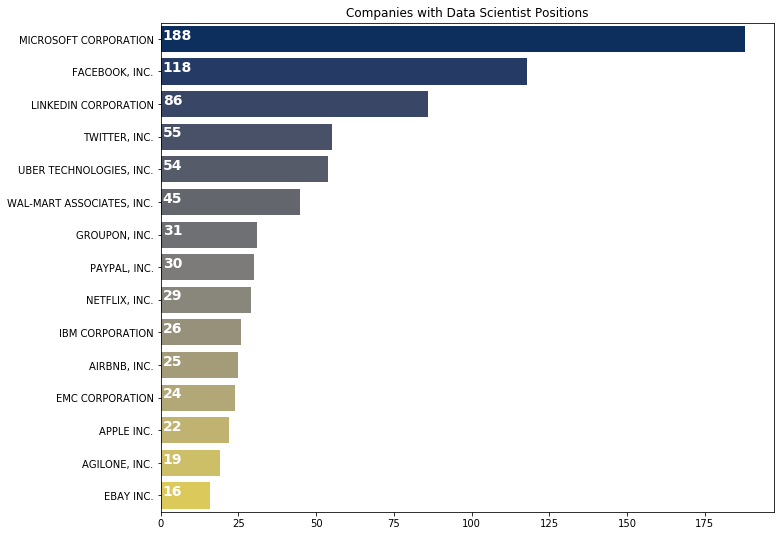

In [21]:
plt.figure(figsize=(11,9))
data_coun=data_scientist['EMPLOYER_NAME'].value_counts()[:15]
dc=sns.barplot(y=data_coun.index,x=data_coun.values,palette=sns.color_palette('cividis',15))
for i, v in enumerate(data_coun.values): 
    dc.text(.7, i, v,fontsize=14,color='white',weight='bold')
plt.title('Companies with Data Scientist Positions')
plt.show()

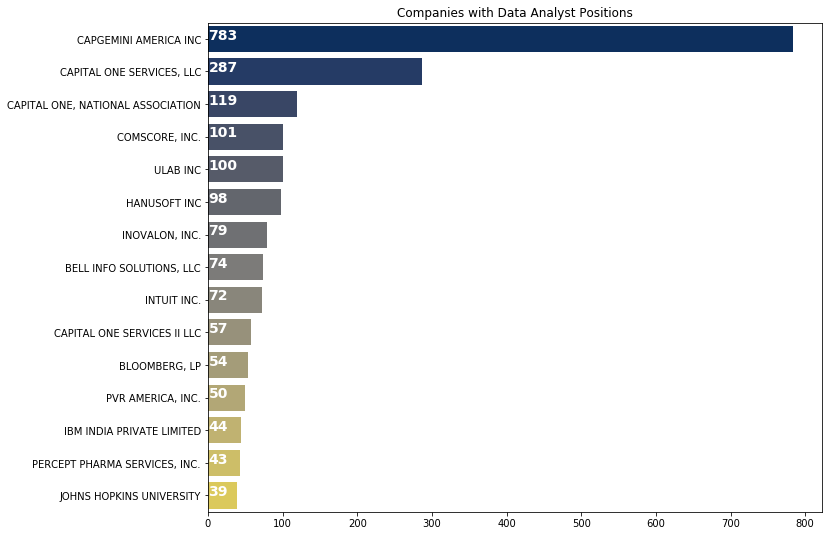

In [22]:
plt.figure(figsize=(11,9))
data_coun=data_analyst['EMPLOYER_NAME'].value_counts()[:15]
dc=sns.barplot(y=data_coun.index,x=data_coun.values,palette=sns.color_palette('cividis',15))
for i, v in enumerate(data_coun.values): 
    dc.text(.7, i, v,fontsize=14,color='white',weight='bold')
plt.title('Companies with Data Analyst Positions')
plt.show()

#### 5. What is the trend of case status over years? 

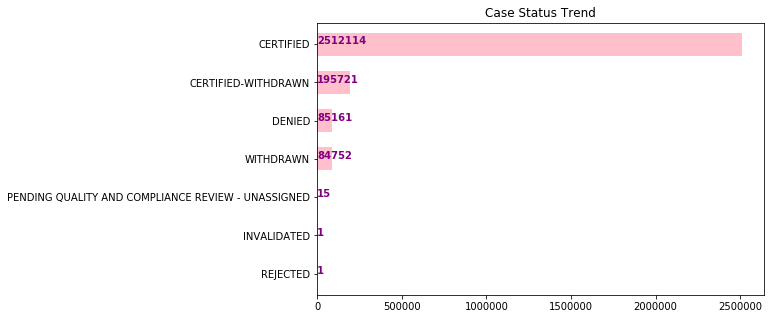

In [23]:
# Visualize 'CASE_STATUS' trend over time
plt.figure(figsize=(8,5))
cs=data['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.6,color='pink')
for index, value in enumerate(data['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    cs.text(.8, index, value,fontsize=10,color='purple',weight='bold')
plt.title('Case Status Trend')
plt.show()

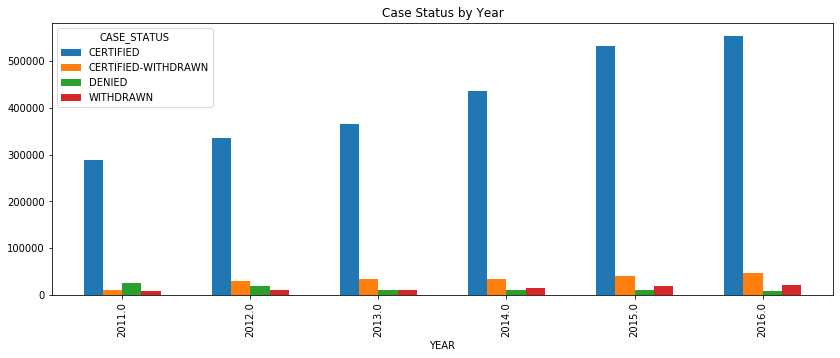

In [24]:
# Visualize specific case status over years 
csy=data[data['CASE_STATUS'].isin(['CERTIFIED','DENIED','CERTIFIED-WITHDRAWN','WITHDRAWN'])]
csy=csy.groupby(['YEAR','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
csy.pivot('YEAR','CASE_STATUS','JOB_TITLE').plot.bar(width=0.6)
fig=plt.gcf()
fig.set_size_inches(14,5)
plt.title('Case Status by Year')
plt.show()

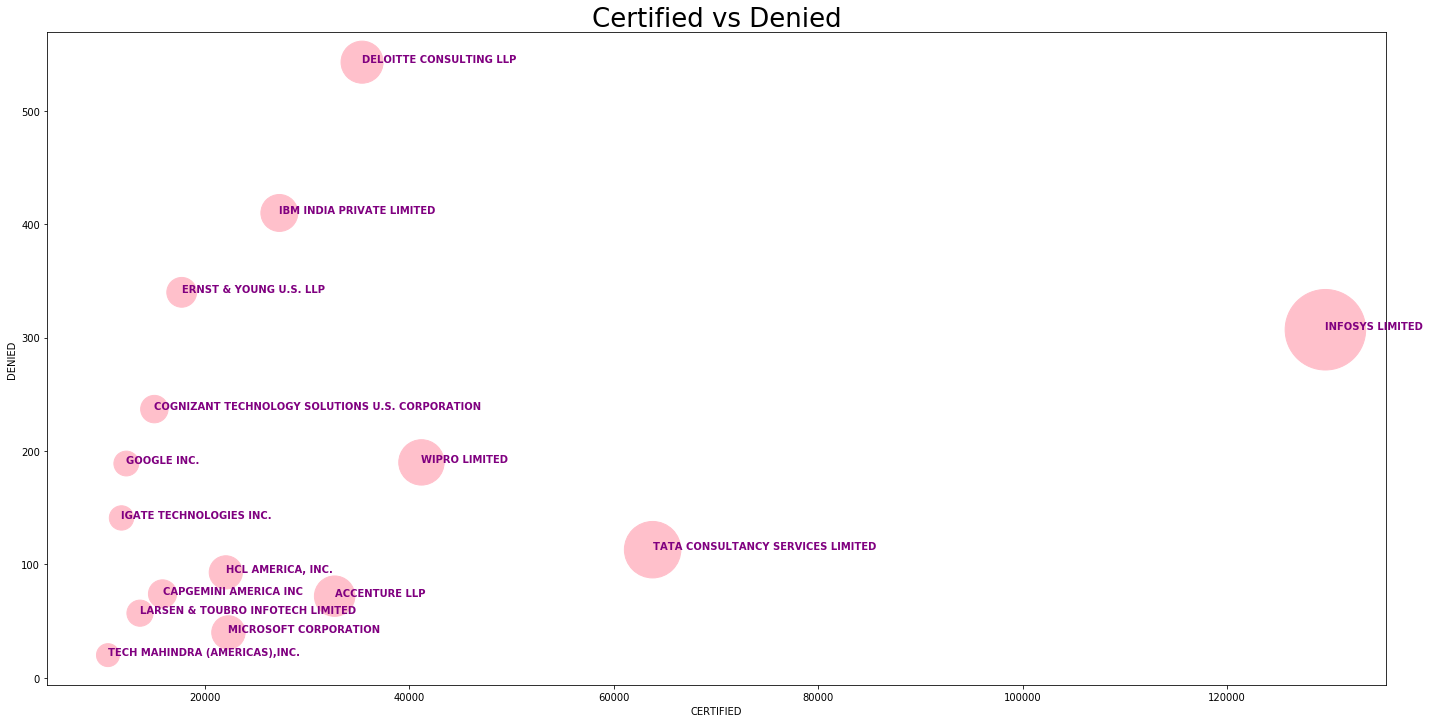

In [42]:
# Case status distribution of top employers (CERTIFIED vs DENIED)
te=data[data['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
te=te[te['EMPLOYER_NAME'].isin(te['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:15].index)]
te=te.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
te=te.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(24,12))
plt.scatter('CERTIFIED','DENIED',data=te,s=te['CERTIFIED']*0.05,color='pink')
for i in range(te.shape[0]):
    plt.text(te['CERTIFIED'].values[i],te['DENIED'].values[i],s=te.index[i],color='purple',weight='bold')
plt.title('Certified vs Denied',size=26)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

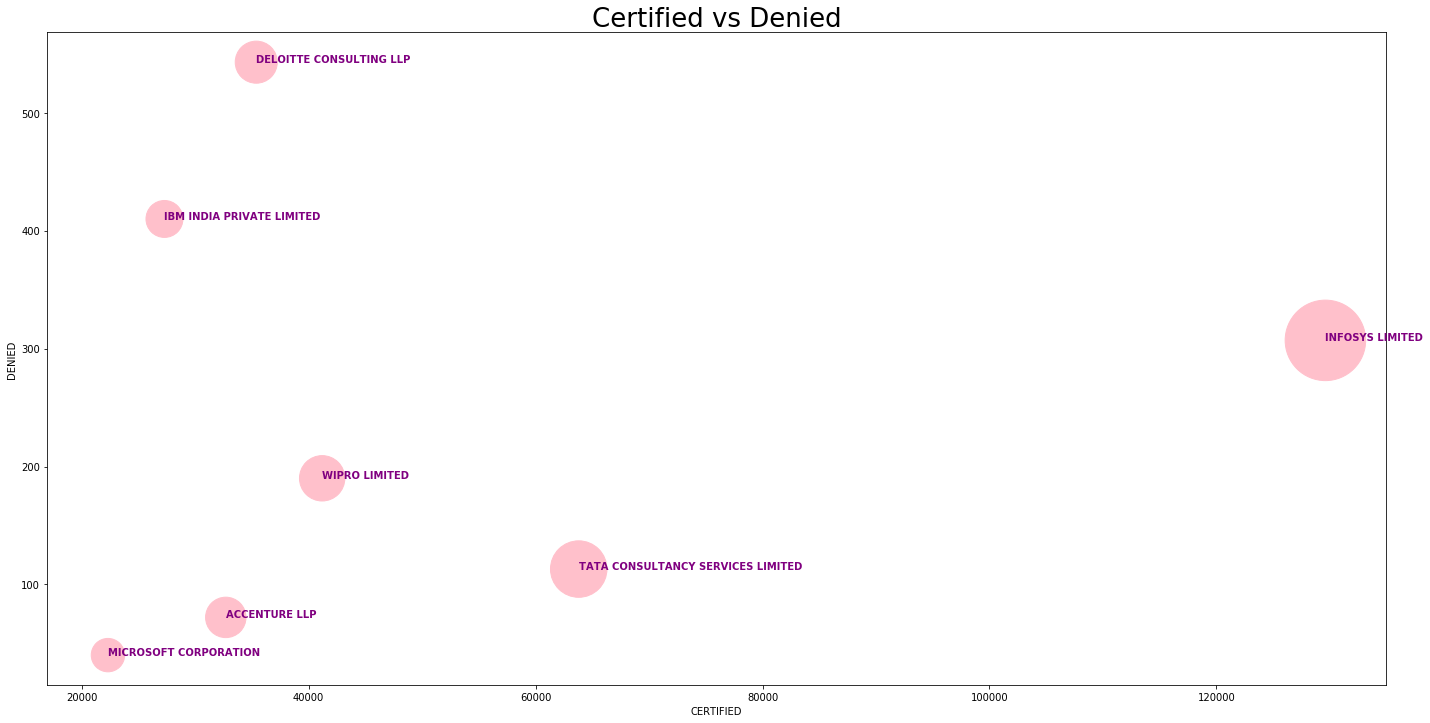

In [45]:
# Case status distribution of top employers (CERTIFIED vs DENIED)
te=data[data['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
te=te[te['EMPLOYER_NAME'].isin(te['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:7].index)]
te=te.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
te=te.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(24,12))
plt.scatter('CERTIFIED','DENIED',data=te,s=te['CERTIFIED']*0.05,color='pink')
for i in range(te.shape[0]):
    plt.text(te['CERTIFIED'].values[i],te['DENIED'].values[i],s=te.index[i],color='purple',weight='bold')
plt.title('Certified vs Denied',size=26)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

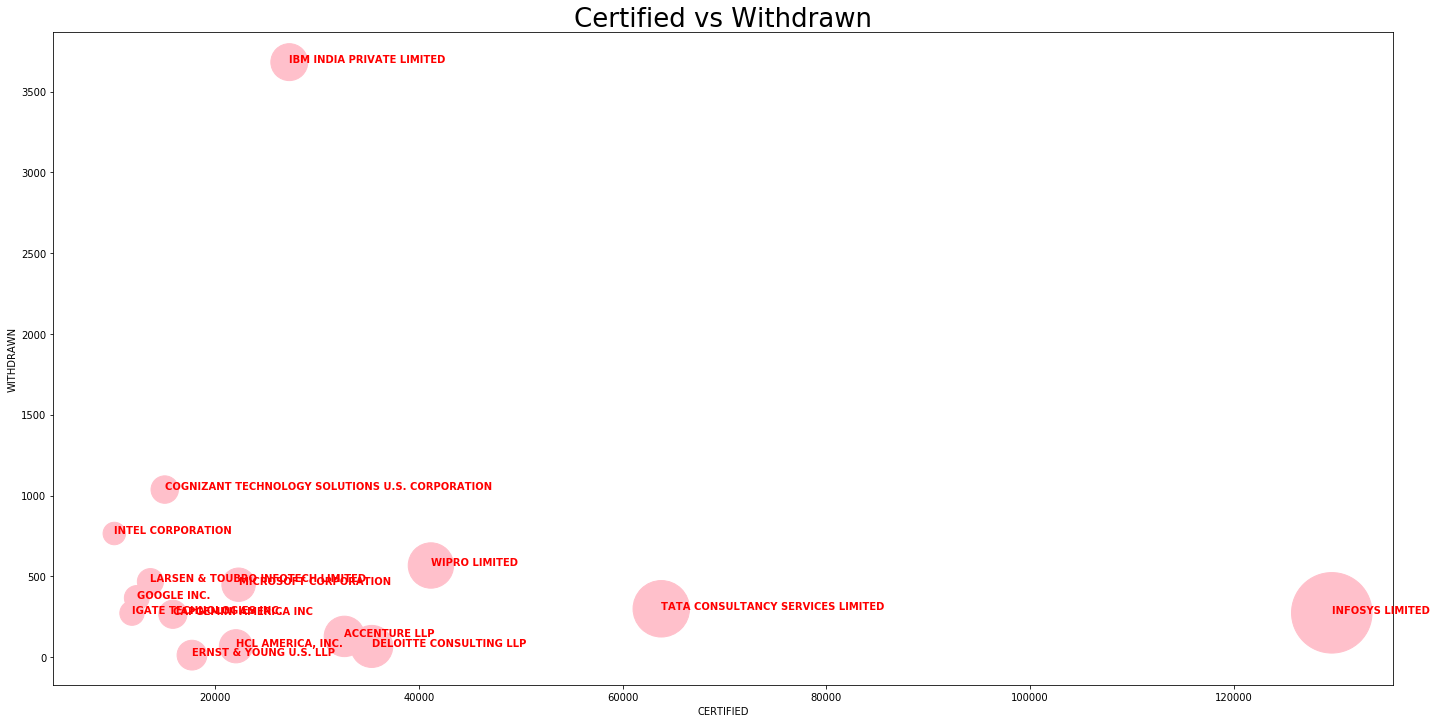

In [66]:
# Case status distribution of top employers (Certified vs WITHDRAWN)
te=data[data['CASE_STATUS'].isin(['CERTIFIED','WITHDRAWN'])]
te=te[te['EMPLOYER_NAME'].isin(te['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:15].index)]
te=te.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
te=te.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(24,12))
plt.scatter('CERTIFIED','WITHDRAWN',data=te,s=te['CERTIFIED']*0.05,color='pink')
for i in range(te.shape[0]):
    plt.text(te['CERTIFIED'].values[i],te['WITHDRAWN'].values[i],s=te.index[i],color='red',weight='bold')
plt.title('Certified vs Withdrawn',size=26)
plt.xlabel('CERTIFIED')
plt.ylabel('WITHDRAWN')
plt.show()

#### 6. What is the fluctuation of H1B application amount over years?

In [27]:
# Display object variable frequencies for variable 'YEAR'
data['YEAR'].value_counts()

2016.0    629299
2015.0    600120
2014.0    498027
2013.0    422427
2012.0    394267
2011.0    333625
Name: YEAR, dtype: int64

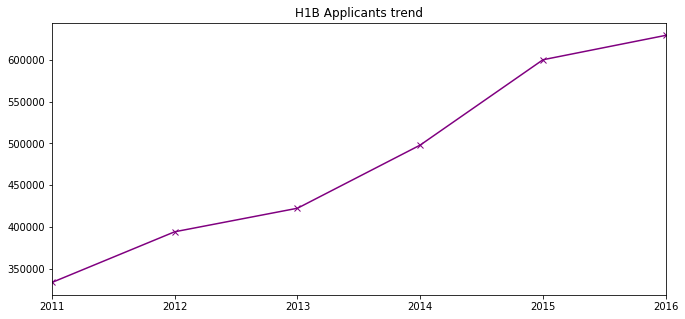

In [28]:
# Visualize application amount over time
plt.figure(figsize=(11,5))
data['YEAR'].value_counts().sort_values().plot(marker='x', color='purple')
plt.title('H1B Applicants trend')
plt.xlim([2011,2016])
plt.show()

#### 7. Visualization of H1B application geographic distribution

In [55]:
# Visualize H1B geographic distribution
h_lng = data.lon
h_lat = data.lat

In [56]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [57]:
# Get coordinates from latitude and longitude
hx, hy = lat_lng_to_pixels(h_lat, h_lng)
hy.head()

0   -37.016502
1   -40.273396
2   -37.592451
3   -37.952293
4   -38.350890
Name: lat, dtype: float64

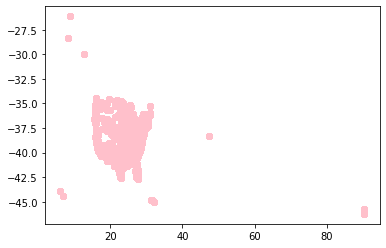

In [61]:
plt.scatter(hx, hy,color='pink')

(11.0, 36.0, -45.0, -33.0)

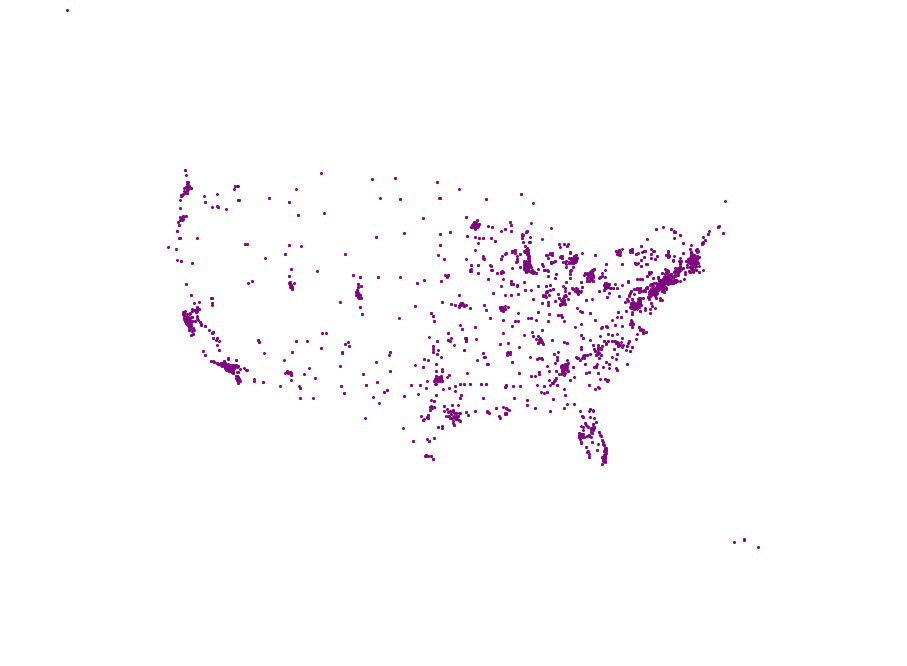

In [62]:
# Specify the figure size
plt.figure(figsize=(16, 12))
plt.scatter(hx, hy, s=.8, alpha=0.3,color='purple')
plt.axis('equal')
plt.xlim(11.0, 36.0)
plt.ylim(-45.0, -33.0)
plt.axis('off')

#### 8. Explore the wage distribution, and what's the relationship between wage and case status?

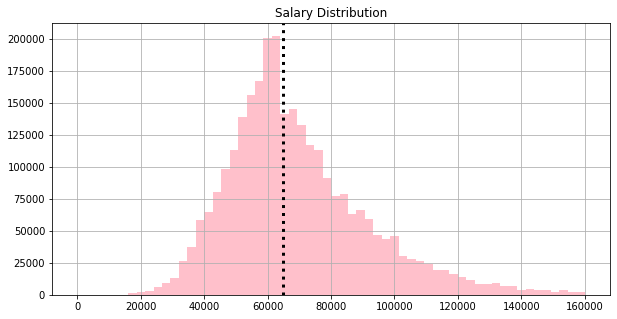

In [34]:
plt.figure(figsize=(10,5))
data[data['PREVAILING_WAGE']<160000].PREVAILING_WAGE.hist(bins=60,color='pink')
plt.axvline(data[data['PREVAILING_WAGE']<=160000].PREVAILING_WAGE.median(), color='black', linestyle='dotted', linewidth=3)
plt.title('Salary Distribution')
plt.show()

C:\Users\sheng\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


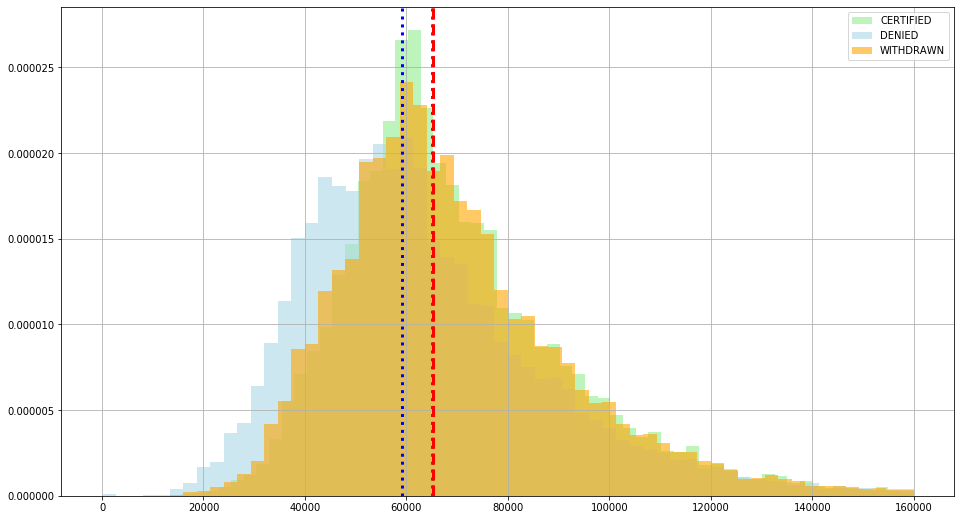

In [35]:
# Split the wages by their CASE_STATUS
plt.figure(figsize=(16,9))
data[(data['PREVAILING_WAGE']<160000)&(data['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.hist(bins=60, color="lightgreen", alpha=0.6, label='CERTIFIED', normed=True)
plt.axvline(data[(data['PREVAILING_WAGE']<=160000)&(data['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.median(), color='green', linestyle='dotted', linewidth=3)
data[(data['PREVAILING_WAGE']<160000)&(data['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.hist(bins=60,color="lightblue", alpha=0.6, label='DENIED', normed=True)
plt.axvline(data[(data['PREVAILING_WAGE']<=160000)&(data['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.median(), color='blue', linestyle='dotted', linewidth=3)
data[(data['PREVAILING_WAGE']<160000)&(data['CASE_STATUS']=='WITHDRAWN')].PREVAILING_WAGE.hist(bins=60,color="orange", alpha=0.6, label='WITHDRAWN', normed=True)
plt.axvline(data[(data['PREVAILING_WAGE']<=160000)&(data['CASE_STATUS']=='WITHDRAWN')].PREVAILING_WAGE.median(), color='red', linestyle='dashed', linewidth=3)
plt.legend()
plt.show()

#### 9.Explore the salary for data related job

In [47]:
ds=data.dropna(subset=['JOB_TITLE'])
ds=ds[ds['JOB_TITLE'].str.contains('DATA')]
data_analyst=ds[ds['JOB_TITLE'].str.contains('DATA ANALYST')]
data_scientist=ds[ds['JOB_TITLE'].str.contains('DATA SCIENTIST')]

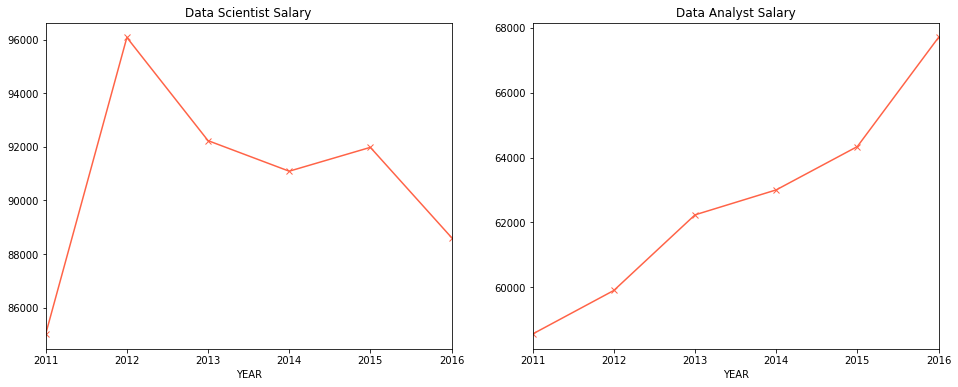

In [51]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data_scientist[data_scientist['PREVAILING_WAGE']<160000].groupby(['YEAR'])['PREVAILING_WAGE'].mean().plot(ax=ax[0],marker='x',color='tomato')
data_analyst[data_analyst['PREVAILING_WAGE']<160000].groupby(['YEAR'])['PREVAILING_WAGE'].mean().plot(ax=ax[1],marker='x',color='tomato')
for i,j in zip([0,1],['Data Scientist Salary','Data Analyst Salary']):
    ax[i].set_title(j)
for i in [0,1]:
    ax[i].set_xlim([2011,2016])
plt.show()

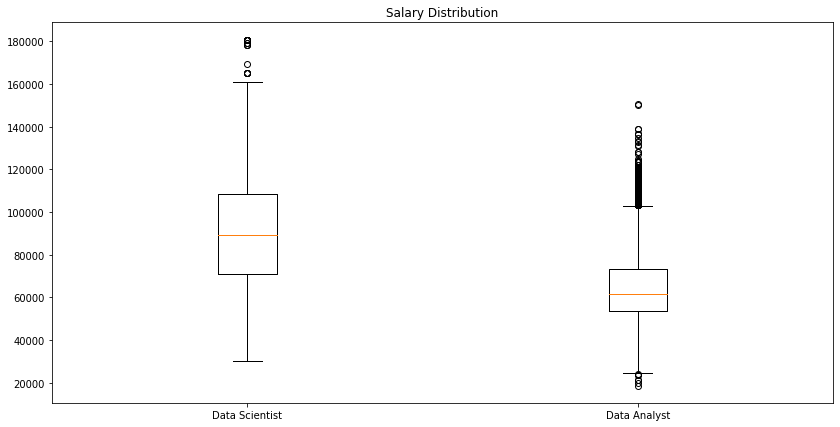

In [53]:
# Visualize salary distribution for data related job
f,ax=plt.subplots(figsize=(14,7))
plt.boxplot([data_scientist[data_scientist['PREVAILING_WAGE']<220000].PREVAILING_WAGE,data_analyst[data_analyst['PREVAILING_WAGE']<220000].PREVAILING_WAGE])
ax.set_xticklabels(['Data Scientist','Data Analyst'])
ax.set_title('Salary Distribution')
plt.show()

In [39]:
# End